In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Task 1: Generate Synthetic Dataset
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2023-01-01', freq='D')
sales = np.random.randint(10, 100, size=len(date_rng))

data = {'Date': date_rng, 'Sales': sales}
df = pd.DataFrame(data)

In [ ]:
df

,Date,Sales
0,2020-01-01,61
1,2020-01-02,24
2,2020-01-03,81
3,2020-01-04,70
4,2020-01-05,30
...,...,...
1092,2022-12-28,99
1093,2022-12-29,55
1094,2022-12-30,21
1095,2022-12-31,99


In [ ]:
# Task 2: Data Exploration and Preprocessing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1097 non-null   datetime64[ns]
 1   Sales   1097 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.3 KB
None


In [ ]:
print(df.describe())

             Sales
count  1097.000000
mean     53.054695
std      26.238601
min      10.000000
25%      30.000000
50%      53.000000
75%      74.000000
max      99.000000


In [ ]:
print(df.isnull().sum())

Date     0
Sales    0
dtype: int64


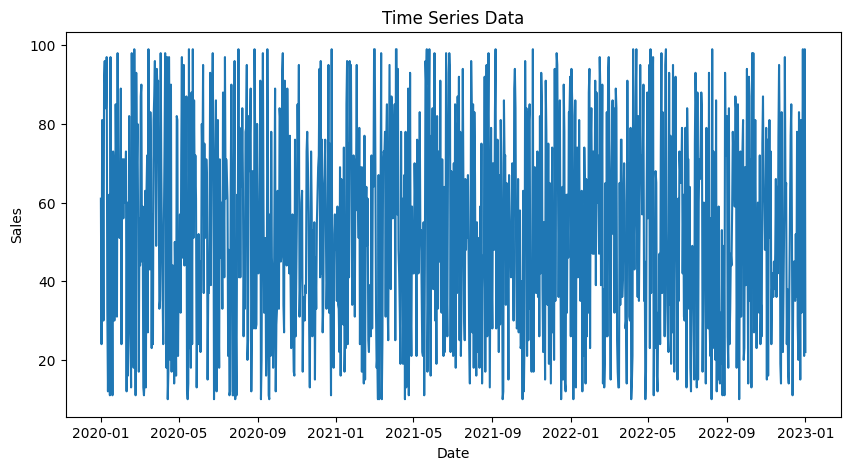

In [ ]:
# Task 3: Time Series Analysis
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Data')
plt.show()

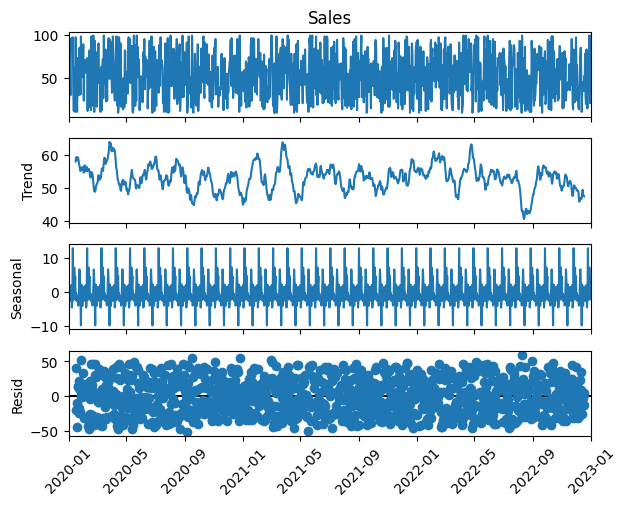

In [ ]:
result = seasonal_decompose(df['Sales'], model='additive', period=30)
result.plot()
plt.xticks(rotation=45)
plt.show()

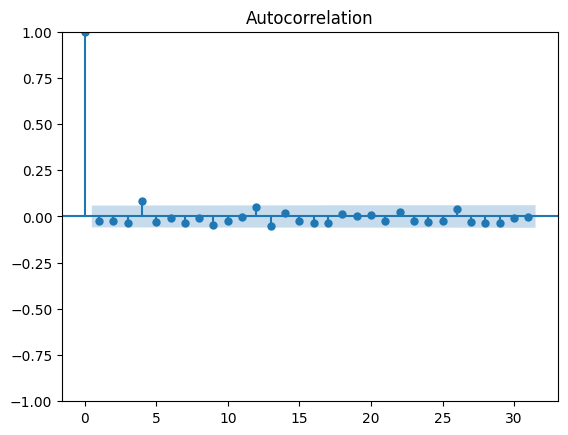

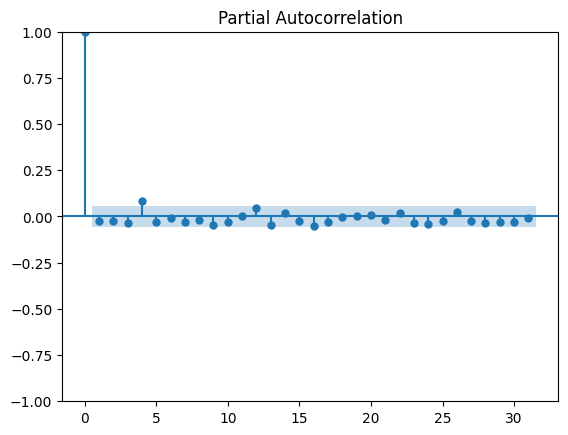

In [ ]:
plot_acf(df['Sales'])
plot_pacf(df['Sales'])
plt.show()

In [ ]:
# Task 5: Train and Evaluate Models
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)

In [ ]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 673.6618945048913


<ipython-input-46-3e79eac7ff8e>:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+2, closed='right')


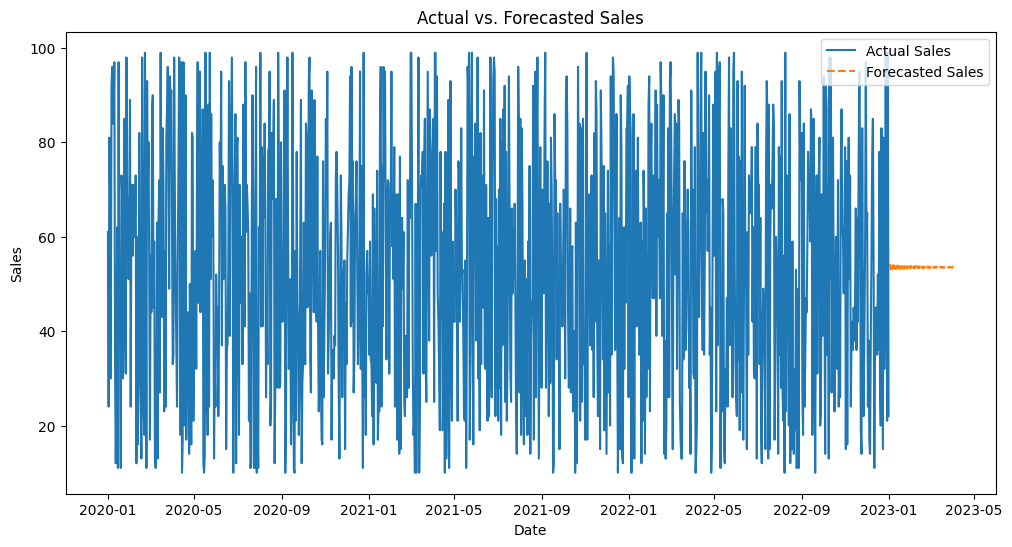

In [ ]:
# Task 6: Future Sales Prediction
forecast_steps = 90  # Forecast for the next 90 days
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+2, closed='right')
future_forecast = model_fit.forecast(steps=forecast_steps)
forecast_df = pd.DataFrame({'Date': forecast_index[1:], 'Forecasted Sales': future_forecast})

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Sales'], label='Forecasted Sales', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Forecasted Sales')
plt.legend()
plt.show()